In [134]:
## FFR120
# Felix Waldschock 2023

## Exercise 1.6 Two dimensional gas in a box  

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use('science')

In [136]:
# determine simulation parameters
N = 100 # number of particles
eta_0 = 1
sigma_0 = 1
m_0 = 1
L = 100 * sigma_0 # length of the box
v_0 = np.sqrt(2 * eta_0 / m_0) # initial velocity


$v_0 = \sqrt{2\eta / m_0}$  
$t_0 = \sigma_0\sqrt{m_0 / 2 \eta}$

Text(0.5, 1.0, 'Velocity field')

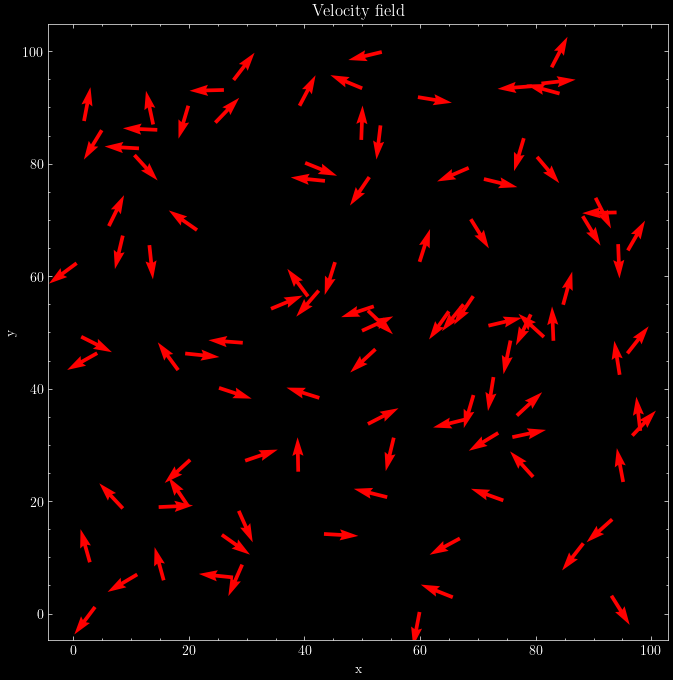

In [137]:
# init the velocities, random direction
magnitude = 2 * v_0
v = np.ones((N,2))
for i in range(N):
    randAngle = np.random.rand() * 2 * np.pi
    v[i,0] = np.sin(randAngle) * magnitude
    v[i,1] = np.cos(randAngle) * magnitude

# init the positions and ensure that all particles have a distance of at least sigma_0
r = np.random.rand(N,2) * L
for i in range(N):
    for j in range(N):
        if i != j:
            while np.linalg.norm(r[i] - r[j]) < sigma_0:
                r[i] = np.random.rand(2) * L

# plot velocities at positions in a vector field
plt.figure(figsize=(8,8))
plt.quiver(r[:,0], r[:,1], v[:,0], v[:,1], color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field')



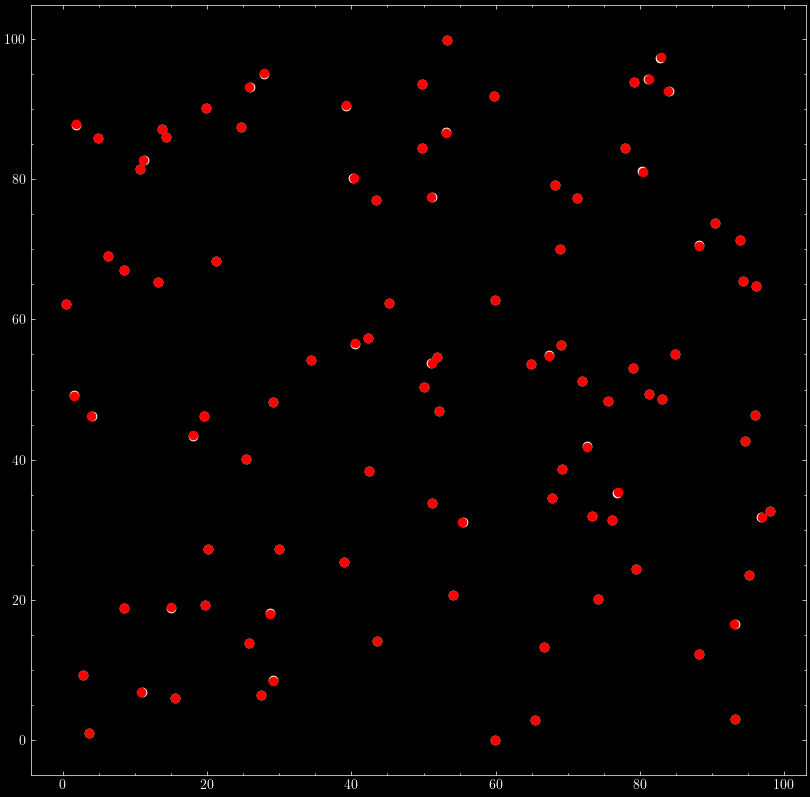

In [144]:
# implement the simulation -> equation 1.10
def multipleParicles(r, v, N, dt):
    r_new = np.zeros((N,2))
    v_new = np.zeros((N,2))

    # calculate the distance between the particles -> norm between the positions
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i != j:
                D[i,j] = np.linalg.norm(r[i] - r[j])

    # calculate the force between the particles -> eq 1.11
    F = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i != j:
                F[i,j] = 4 * eta_0 * ( (sigma_0/D[i,j])**12 - (sigma_0/D[i,j])**6)

    # update the particles
    for i in range(N):
        r_new[i] = r[i] + dt * v[i]
        v_new[i] = v[i] + dt * np.sum(F[i,:]) / m_0
        #print('i = ', i, 'F = ', np.sum(F[i,:]))
    return r_new, v_new

# run the simulation
dt = 0.01
iterions = 10e3
plt.figure(figsize=(10,10))

r_init = r
v_init = v

# run the simulation
r, v = multipleParicles(r, v, N, dt)

# plot the initial positions
plt.scatter(r_init[:,0], r_init[:,1], color='w', label='Initial positions')
plt.scatter(r[:,0], r[:,1], color='r', label='Positions after 1000 iteration')

plt.show()
